# [9660] Exercise 8 - Naive Bayes
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/heart_disease_2.csv

## Exercise 8 Requirements
* Load data into dataframe
* Examine data
* Encode categorical variables
  * Ordinal encode 'chest_pain_type', 'resting_ECG', 'exercise_induced_angina'
  * Dummy (one-hot) encode 'gender', 'slope_peak_ST'
* Prepare data for model training and testing
  * Separate independent and dependent variables
  * Split train and test sets
* Train naive bayes classifier model with default hyperparameters
  * Predict using the test set
  * Calculate and display model accuracy
  * Display classification report
  * Display confusion matrix

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/20/24 13:27:47


### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Load data

Heart Failure Prediction

Problem Statement  
With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

Aim  
To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
It is a binary classification with multiple numerical and categorical features.

Dataset Attributes  
Age : age of the patient [years]  
Sex : sex of the patient [M: Male, F: Female]  
ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
RestingBP : resting blood pressure [mm Hg]  
Cholesterol : serum cholesterol [mm/dl]  
FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]   
ExerciseAngina : exercise-induced angina [Y: Yes, N: No]  
Oldpeak : oldpeak = ST [Numeric value measured in depression]  
ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
HeartDisease : output class [1: heart disease, 0: Normal]

In [4]:
# Load data into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/heart_disease_2.csv')

### Examine data

In [5]:
df.shape

(918, 12)

In [6]:
df.sample(5)

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,old_peak_ST,slope_peak_ST,heart_disease
696,35,M,ASY,120,198,0,Normal,130,Y,1.6,Flat,1
827,43,F,NAP,122,213,0,Normal,165,N,0.2,Flat,0
408,59,M,ASY,110,0,1,Normal,94,N,0.0,Flat,1
531,64,M,ASY,143,306,1,ST,115,Y,1.8,Flat,1
492,49,M,TA,130,0,0,ST,145,N,3.0,Flat,1


In [8]:
# Display class distribution
df['heart_disease'].value_counts()

,count
heart_disease,
1,508
0,410


In [9]:
# Check for missing values
df.isnull().sum()

,0
age,0
gender,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_ECG,0
max_heart_rate,0
exercise_induced_angina,0
old_peak_ST,0


### Prepare data

#### Ordinal encode 'chest_pain_type', 'resting_ECG',  'exercise_induced_angina'

In [10]:
# List unique values for 'chest_pain_type'
df['chest_pain_type'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [12]:
# Ordinal encode 'chest_pain_type'
#  category order should be 'NAP', 'ATA', 'ASY', 'TA'
oe = OrdinalEncoder(categories=[['NAP', 'ATA', 'ASY','TA']])
df['chest_pain_type'] = oe.fit_transform(df[['chest_pain_type']])

In [14]:
# List unique values for 'resting_ECG'
df['resting_ECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [15]:
# Ordinal encode 'resting_ECG'
#  category order should be 'Normal', 'ST', 'LVH'
oe = OrdinalEncoder(categories=[['Normal', 'ST', 'LVH']])
df['resting_ECG'] = oe.fit_transform(df[['resting_ECG']])

In [16]:
# List unique values for 'exercise_induced_angina'
df['exercise_induced_angina'].unique()

array(['N', 'Y'], dtype=object)

In [17]:
# Ordinal encode 'exercise_induced_angina'
#  category order should be 'N', 'Y'
oe = OrdinalEncoder(categories=[['N', 'Y']])
df['exercise_induced_angina'] = oe.fit_transform(df[['exercise_induced_angina']])

#### Dummy (one-hot) encode 'gender', 'slope_peak_ST'


In [18]:
df = pd.get_dummies(df, columns=['gender', 'slope_peak_ST'], dtype=int)
df.head()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,old_peak_ST,heart_disease,gender_F,gender_M,slope_peak_ST_Down,slope_peak_ST_Flat,slope_peak_ST_Up
0,40,1.0,140,289,0,0.0,172,0.0,0.0,0,0,1,0,0,1
1,49,0.0,160,180,0,0.0,156,0.0,1.0,1,1,0,0,1,0
2,37,1.0,130,283,0,1.0,98,0.0,0.0,0,0,1,0,0,1
3,48,2.0,138,214,0,0.0,108,1.0,1.5,1,1,0,0,1,0
4,54,0.0,150,195,0,0.0,122,0.0,0.0,0,0,1,0,0,1


### Separate independent and dependent variables

In [19]:
# Independent variables: All variables except 'heart_disease'
# Dependent variable: 'heart_disease'
X = df.drop('heart_disease', axis=1)     # Independent variables
y = df['heart_disease']

### Split data into training and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3, random_state=42)

### Train Gaussian Naive Bayes classifier

In [21]:
# Instantiate model
model = GaussianNB()
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [22]:
# Train model
model.fit(X_train, y_train)

GaussianNB()

In [24]:
# Use model to predict test_set
y_pred = model.predict(X_test)

### Evaluate Gaussian Naive Bayes model performance

In [25]:
# Display model accuracy
print(f'Accuracy = {round(accuracy_score(y_test, y_pred)*100,2)}%')

Accuracy = 89.13%


In [26]:
# Display classification report
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       123
           1       0.91      0.89      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



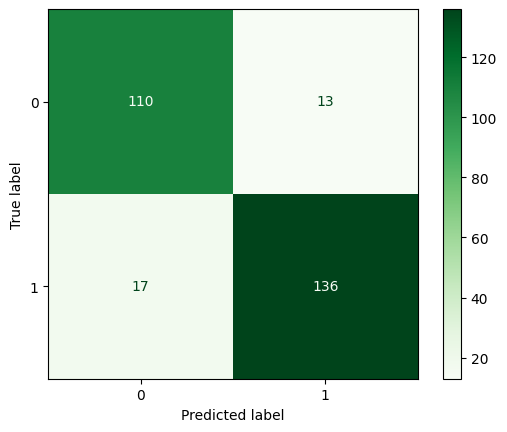

In [27]:
# Display confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()